In [ ]:
#===================================================================
#                        IMPORTANTE
#  Por favor salvem o Jupyter Notebook como ATV04-FulanoDeTal.ipynb, 
#  onde FulanoDeTal é o seu nome completo e postem em nossa sala de
#  aula no MS Teams até 23:59hs (03/09/2020) !


In [1]:
# Atividade 1 - Para a função y = a * sin(b*x + c) faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

In [4]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

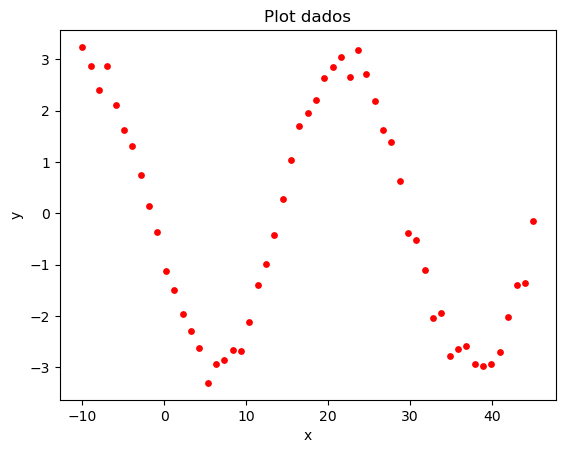

In [87]:
# (a) gere um conjunto de dados incluindo ruído;
def sen(x, a, b, c):
    return a*np.sin(b*x + c)

X = np.linspace(-10,45,55)
Y = sen(X, 3, 0.2, 3.4536982)
ruido = 0.2*np.random.normal(size=Y.size)
Y = Y + ruido

plt.scatter(X, Y, s=15, color="red", marker="o")
plt.title("Plot dados")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

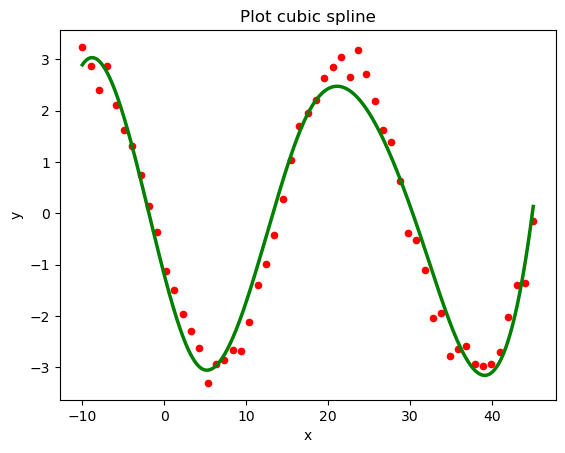

In [89]:
# (b) suavização tipo "cubic spline"

spl = UnivariateSpline(X, Y)
xs = np.linspace(-10, 45, 1000)

spl.set_smoothing_factor(8.2) #Define o fator de suavização da spline como 8.2
plt.plot(X, Y, 'ro', ms = 4.5) #lota os pontos de dados originais X e Y como pontos vermelhos 'ro', com um tamanho de marcador (ms) de 4,5
plt.plot(xs, spl(xs), 'g', lw = 2.5)

plt.title("Plot cubic spline")
plt.xlabel('x')
plt.ylabel('y');

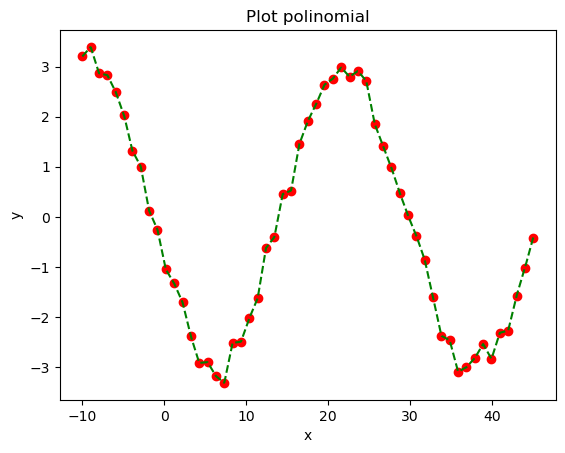

In [36]:
# (c) suavização tipo Savitz Golay;

y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(-10, 45, 1000)
y = y_int(x_int)

plt.plot(X, Y, 'ro', x_int, y, 'g--')

plt.title("Plot polinomial")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

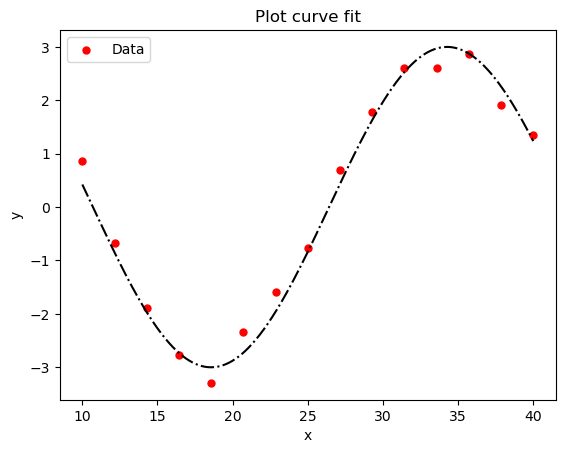

In [45]:
# (d) interpolação polinomial;
X_fit = np.linspace(10, 40, 15)
Y_fit = funcao(X_fit, 3, 0.2, 1)

ruido = 0.2 * np.random.normal(size=Y_fit.size)
Y_fit = Y_fit + ruido

# Criando o gráfico
fig, ax = plt.subplots()
ax.scatter(X_fit, Y_fit, s=25, color='red', label='Data', marker='o')  # Usando X_fit aqui
X_plot = np.linspace(10, 40, 1000)
Y_plot = funcao(X_plot, 3, 0.2, 1)

# Ajuste de curva
pars, cov = curve_fit(f=funcao, xdata=X_plot, ydata=Y_plot, p0=[3, 0.2, 1])
ax.plot(X_plot, funcao(X_plot, *pars), linestyle='-.', linewidth=1.5, color='black')  # Corrigido para adicionar a cor

# Configurações do gráfico
plt.title("Plot curve fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend() 
plt.show()

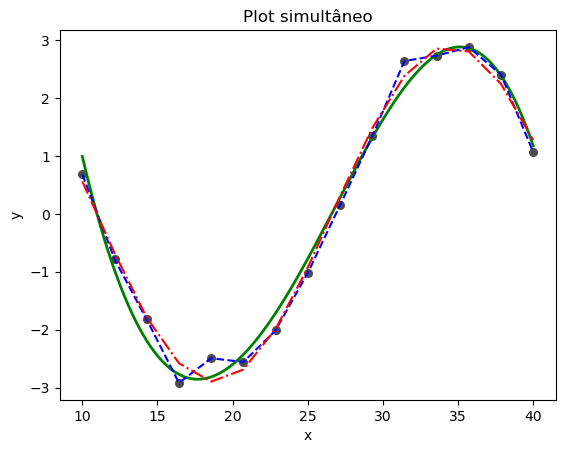

In [53]:
# (e) ajuste de curva
def funcao(x):
    return 3 * np.sin(0.2 * x + 1)

# Plotando os dados
X = np.linspace(10, 40, 15)
Y = funcao(X)
ruido = 0.2 * np.random.normal(size=Y.size)
Y = Y + ruido
plt.scatter(X, Y, s=30, marker='o', color='#4B4B4B')

# Ajuste cubic spline
spl = UnivariateSpline(X, Y)
xs = np.linspace(10, 40, 1000)
spl.set_smoothing_factor(0.8)
plt.plot(xs, spl(xs), 'g', lw=2)

# Ajuste polinomial
y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(10, 40, 1000)
y = y_int(x_int)
plt.plot(x_int, y, 'b--')

# Curve fit
def funcao_fit(x, a, b, c):  # Renomeando a função para ajuste
    return a * np.sin(b * x + c)

# Usando os dados com ruído para o ajuste
pars, cov = curve_fit(f=funcao_fit, xdata=X, ydata=Y, p0=[3, 0.2, 1])
plt.plot(X, funcao_fit(X, *pars), linestyle='-.', linewidth=1.5, color="red") 

# Configurações do gráfico
plt.title("Plot simultâneo")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
Letra g) Percebe-se uma grande disparidade entre os tipos de ajustes feitos. Enquanto o
gráfico de curve fit é apropriado para situações de extrapolação, isto é, quando
necessitamos conhecer os parâmetros de uma função para prever o que ocorrerá fora dos
dados obtidos, o gráfico de interpolação polinomial nos ajuda a interpretar aquilo que já
temos em mãos. No exemplo foi feito um ajuste polinomial linear para que ele se
diferenciasse do curve fit, no entanto, um ajuste cúbico é mais eficiente nesse quesito,
podendo auxiliar com cálculos de integral, por exemplo. Percebe-se, no exemplo da função
seno, que o cubic spline foi o mais distoante, uma vez que foi uma abordagem diferente dos
demais métodos de fit utilizados

In [54]:
# Atividade 2 - Para uma função gaussiana faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

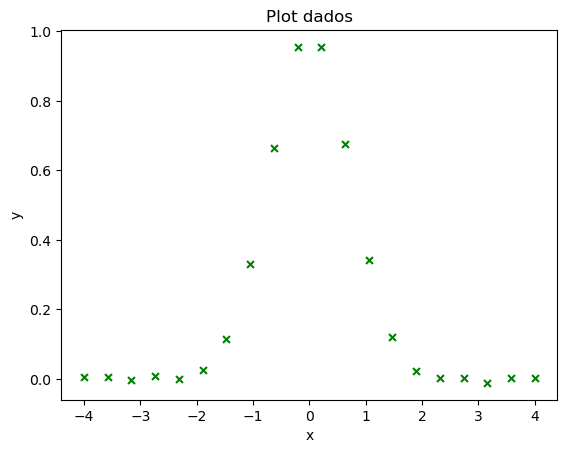

In [57]:
# PARA UMA FUNÇÃO GAUSSIANA: (a) gere um conjunto de dados incluindo ruído;

def funcao(x):
 return np.e**(-x**2)
    
X = np.linspace(-4, 4, 20)
Y = funcao(X)
ruido = 0.005*np.random.normal(size=Y.size)
Y = Y + ruido

plt.scatter(X, Y, s=25, marker='x', color='green')
plt.title("Plot dados")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

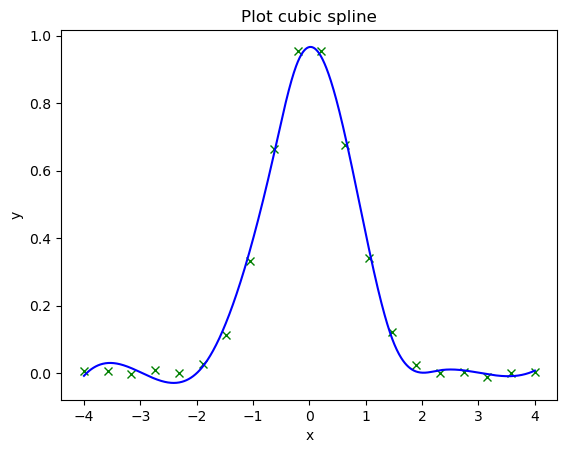

In [60]:
# (b) suavização tipo "cubic spline";

spl = UnivariateSpline(X, Y)
xs = np.linspace(-4, 4, 1000)
spl.set_smoothing_factor(0.01)

plt.plot(X, Y, 'gx', ms = 6)
plt.plot(xs, spl(xs), 'b', lw = 1.5)

plt.title("Plot cubic spline")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

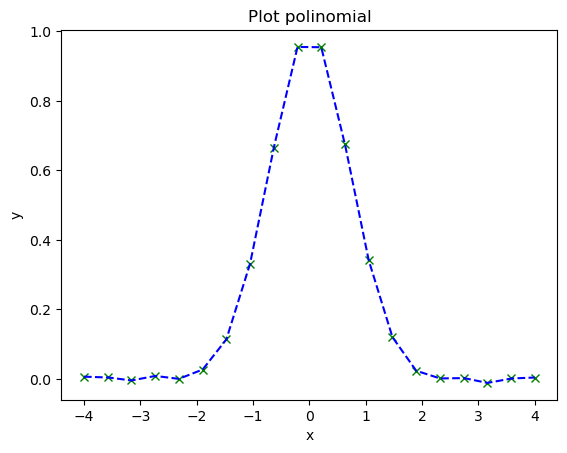

In [61]:
# (c) suavização tipo Savitz Golay;

y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(-4, 4, 1000)

y = y_int(x_int)
plt.plot(X, Y, 'gx', x_int, y, 'b--')

plt.title("Plot polinomial")
plt.xlabel('x')
plt.ylabel('y');

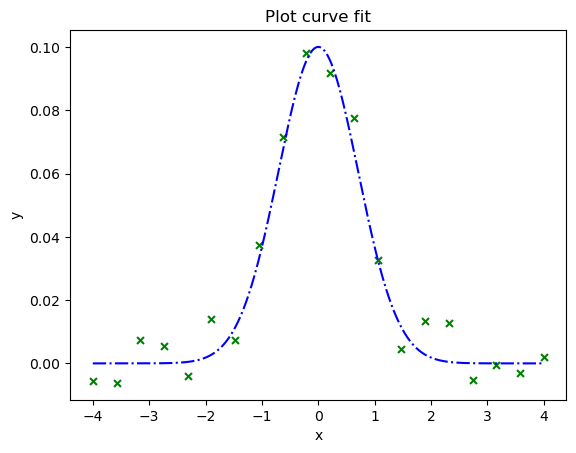

In [64]:
# (d) interpolação polinomial;

def funcao(x, a):
 return a * np.e**(-x**2)
    
X_fit = np.linspace(-4, 4, 20)
Y_fit = funcao(X_fit, 0.1)
ruido = 0.005*np.random.normal(size=Y_fit.size)
Y_fit = Y_fit + ruido

fig, ax = plt.subplots()
ax.scatter(X_fit, Y_fit, s=25, color='green', label='Data', marker='x')

X_plot = np.linspace(-4, 4, 1000)
Y_plot = funcao(X_plot, 0.1)
pars, cov = curve_fit(f=funcao, xdata=X_plot, ydata=Y_plot, p0=[0.1])
ax.plot(X_plot, funcao(X_plot, *pars), linestyle='-.', linewidth=1.5, color="blue")
        
plt.title("Plot curve fit")
plt.xlabel('x')
plt.ylabel('y');

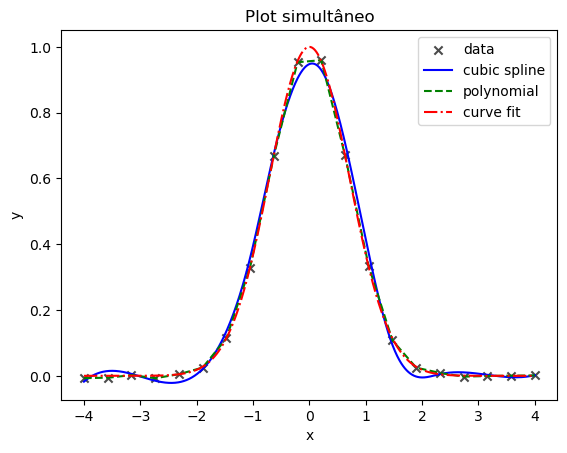

In [69]:
# (e) ajuste de curva;

def funcao(x):
    return np.e**(-x**2)

X = np.linspace(-4, 4, 20)
Y = funcao(X)
ruido = 0.005*np.random.normal(size=Y.size)
Y = Y + ruido

#Plotando os dados
plt.scatter(X, Y, s=35, marker='x', color='#4B4B4B')

#Plotando cubic spline
spl = UnivariateSpline(X, Y)
xs = np.linspace(-4, 4, 1000)
spl.set_smoothing_factor(0.01)
plt.plot(xs, spl(xs), 'b', lw = 1.5)

#Plotando polinomial
y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(-4, 4, 1000)
y = y_int(x_int)
plt.plot(x_int, y, 'g--')

#Plotando curve fit

def funcao(x, a):
    return a * np.e**(-x**2)

X_plot = np.linspace(-4, 4, 1000)
Y_plot = funcao(X_plot, 1.0)

pars, cov = curve_fit(f=funcao, xdata=X_plot, ydata=Y_plot, p0=[1.0])
plt.plot(X_plot, funcao(X_plot, *pars), linestyle='-.', linewidth=1.5, color="red")

#Legenda e outros detalhes
plt.legend(['data', 'cubic spline', 'polynomial', 'curve fit'])
plt.title("Plot simultâneo")
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
# (g) faça uma discussão dos resultados;

Letra f) Percebe-se uma grande disparidade entre os tipos de ajustes feitos. Enquanto o
gráfico de curve fit é apropriado para situações de extrapolação, isto é, quando
necessitamos conhecer os parâmetros de uma função para prever o que ocorrerá fora dos
dados obtidos, o gráfico de interpolação polinomial nos ajuda a interpretar aquilo que já
temos em mãos. No exemplo foi feito um ajuste polinomial linear para que ele se
diferenciasse do curve fit, no entanto, um ajuste cúbico é mais eficiente nesse quesito,
podendo auxiliar com cálculos de integral, por exemplo. No caso da gaussiana, os ajustes
foram bastante próximos um do outro.


In [70]:
# Atividade 3 - Para uma função lorentziana faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

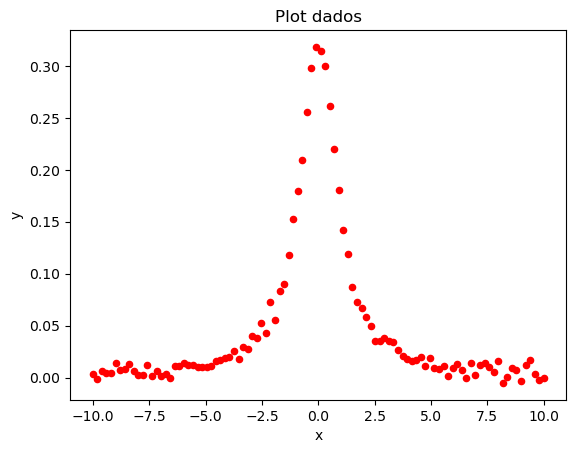

In [106]:
def lorentziana(x):
    return (1/np.pi)*(1/((x)**2+1))

X = np.linspace(-10,10,100)
Y = lorentziana(X)
ruido = 0.005*np.random.normal(size=Y.size)
Y = Y + ruido

plt.scatter(X,Y,s=20,marker='o',color="red")
plt.title("Plot dados")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

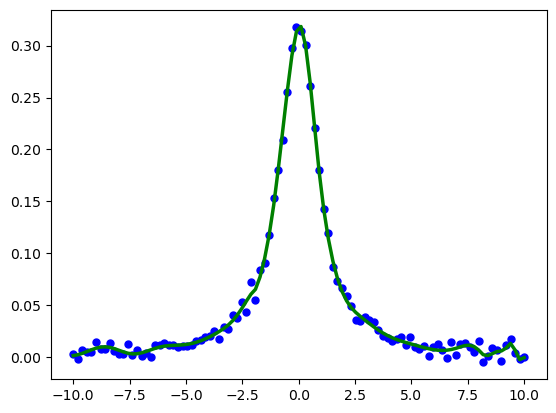

In [107]:
# (b) suavização tipo "cubic spline";

spl = UnivariateSpline(X,Y)
xs = np.linspace(-10,10,100)
spl.set_smoothing_factor(0.002)

plt.plot(X,Y,'bo',ms=5)
plt.plot(xs,spl(xs),'g',lw=2.5);

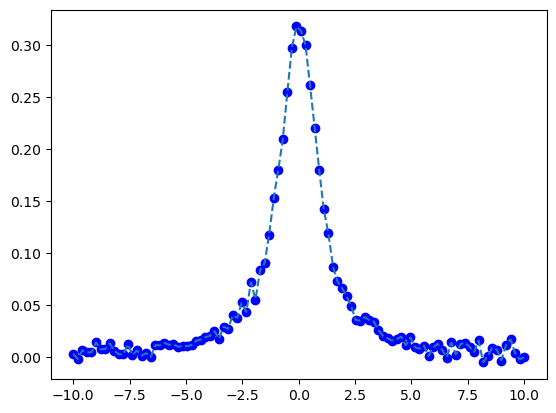

In [110]:
# (c) suavização tipo Savitz Golay;

y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(-10, 10, 1000)
y = y_int(x_int)

plt.plot(X, Y, 'bo', x_int, y, '--') #plotou os 2 de uma vez
plt.show()

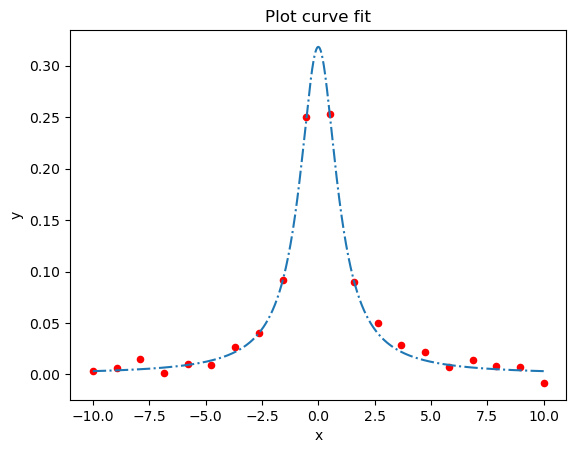

In [123]:
# (d) interpolação polinomial;
def lorentziana(x, A, x0, g):
    return (A / np.pi) * (g / ((x - x0)**2 + g**2))
    
X = np.linspace(-10, 10, 20)
Y = lorentziana(X, 1, 0, 1)
ruido = 0.005*np.random.normal(size=Y.size)
Y = Y + ruido

fig, ax = plt.subplots()
plt.scatter(X,Y,s=20, marker="o", color="red")

X_plot = np.linspace(-10, 10, 1000)
Y_plot = lorentziana(X_plot, 1, 0, 1)
pars, cov = curve_fit(f=lorentziana, xdata=X_plot, ydata=Y_plot, p0=[1, 0, 1])
ax.plot(X_plot, lorentziana(X_plot, *pars), '-.', lw=1.5)

plt.title("Plot curve fit")
plt.xlabel('x')
plt.ylabel('y');

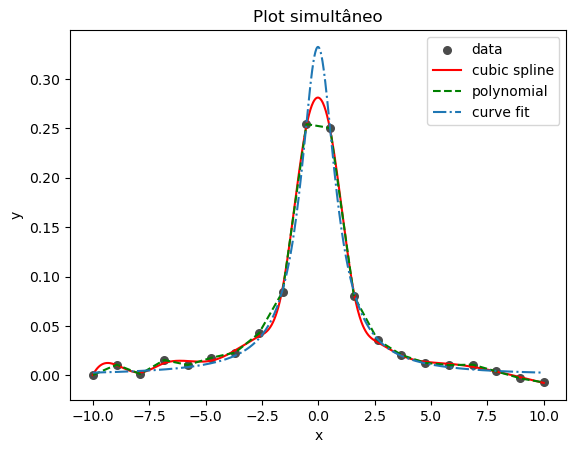

In [127]:
# Plotando os dados
def lorentziana(x):
    return (1 / np.pi) * (1 / ((x)**2 + 1))

X = np.linspace(-10, 10, 20)
Y = lorentziana(X)
ruido = 0.005 * np.random.normal(size=Y.size)
Y = Y + ruido

plt.scatter(X, Y, s=30, marker='o', color='#4B4B4B')

# Plotando cubic spline
spl = UnivariateSpline(X, Y)
xs = np.linspace(-10, 10, 1000)
spl.set_smoothing_factor(0.0001)
plt.plot(xs, spl(xs), lw=1.5, color='red')

# Plotando polinomial
y_int = interp1d(X, Y, 'linear')
x_int = np.linspace(-10, 10, 1000)
y = y_int(x_int)
plt.plot(x_int, y, '--', color='green')

# Plotando curve fit
def lorentziana_fit(x, A, x0, g):
    return (A / np.pi) * (g / ((x - x0)**2 + g**2))

X_plot = np.linspace(-10, 10, 1000)
Y_plot = lorentziana_fit(X_plot, 1, 0, 1)
pars, cov = curve_fit(f=lorentziana_fit, xdata=X, ydata=Y, p0=[1, 0, 1])
plt.plot(X_plot, lorentziana_fit(X_plot, *pars), linestyle='-.', linewidth=1.5)

# Legenda e outros detalhes
plt.title("Plot simultâneo")
plt.legend(['data', 'cubic spline', 'polynomial', 'curve fit'], loc='best')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [130]:
# Atividade 4 - Para o conjunto de dados fornecido abaixo faça:
# (a) leia o conjunto de dados fornecido abaixo;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

###############################################################
# Aqui você pode ler os dados de um arquivo ou declará-los
#
#  Arquivo de dados
   X         Y
   0.15000   0.88074
   0.45000  -0.27343
   0.60000   0.20726
   0.75000  -0.01649
   0.90000  -0.28865
   1.05000  -0.29876
   1.15000  -0.55483
   1.35000  -0.14270
   1.50000   0.23730
   1.65000   0.64194
   1.77000   0.70322
   1.95000   0.89408
   2.10000   0.55641
   2.25000   0.54948
   2.40000   0.75237
   2.55000   0.65511
   2.70000   0.68235
   2.85000   0.63281
   3.00000   0.53248
   3.15000   0.50083
   3.30000   0.42535
   3.45000   0.30699
   3.60000   0.21694
   3.75000   0.69009
   3.90000   0.82114
   4.05000   0.87351
   4.20000   0.96497
   4.35000   0.82450
   4.50000   0.45236
   4.65000   0.25863
   4.80000   0.33738
   4.95000   0.66538
   5.10000   0.45252
   5.25000   0.12255
   5.40000   0.88680
   5.55000   0.86841
   5.70000   0.16588
   5.85000   0.87785
   6.10000   0.42957
   6.15000   0.10375
   6.30000   0.55851
   6.45000   0.98703
   6.60000   0.75136
   6.75000   0.39453
   6.90000   0.92825
   7.05000   0.01087
   7.10000   0.24566
   7.35000   0.08873
   7.50000   0.05992
   7.65000   0.38077
   7.80000   0.13342
   7.95000   0.13246
   8.10000   0.95714
   8.25000   0.22580
   8.40000   0.25862
   8.55000   0.56299
   8.70000   0.23621
   8.85000   0.51565
   9.00000   0.21283
   9.15000   0.00997
   9.30000   0.95753
   9.39000   0.16447
   9.75000   0.45849
   9.90000   0.09871
  10.05000   0.01744
  10.20000   0.54524
  10.35000   0.65995
  10.50000   0.59095
  10.65000   0.05585
  10.80000   0.24324
  10.95000   0.80386
  11.10000   0.22294
  11.25000   0.82716
  11.40000   0.57150
  11.55000   0.45607
  11.85000   0.18047
  12.00000   0.99162
  12.15000   0.09803
  12.38000   0.91456
  12.45000   0.91254
  12.60000   0.19791
  12.75000   0.53686
  12.90000   0.75798
  13.05000   0.50550
  13.20000   0.96838
  13.35000   0.44115
  13.50000   0.34072
  13.65000   0.98092
  13.80000   0.33266
  13.95000   0.53988
  14.10000   0.89722
  14.25000   0.15455
  14.30000   0.16139
  14.55000   0.32429
  14.70000   0.63791
  14.85000   0.81178
  15.30000   0.06709

In [30]:
import pandas as pd

# Lendo o arquivo "dados.txt"
df = pd.read_csv("C:/Users/Luan/Desktop/dados.txt", delim_whitespace=True)

# Exibindo os dados
print(df)

    0.15000  0.88074
0      0.45 -0.27343
1      0.60  0.20726
2      0.75 -0.01649
3      0.90 -0.28865
4      1.05 -0.29876
..      ...      ...
91    14.30  0.16139
92    14.55  0.32429
93    14.70  0.63791
94    14.85  0.81178
95    15.30  0.06709

[96 rows x 2 columns]


    0.15000  0.88074
0      0.45 -0.27343
1      0.60  0.20726
2      0.75 -0.01649
3      0.90 -0.28865
4      1.05 -0.29876
..      ...      ...
91    14.30  0.16139
92    14.55  0.32429
93    14.70  0.63791
94    14.85  0.81178
95    15.30  0.06709

[96 rows x 2 columns]


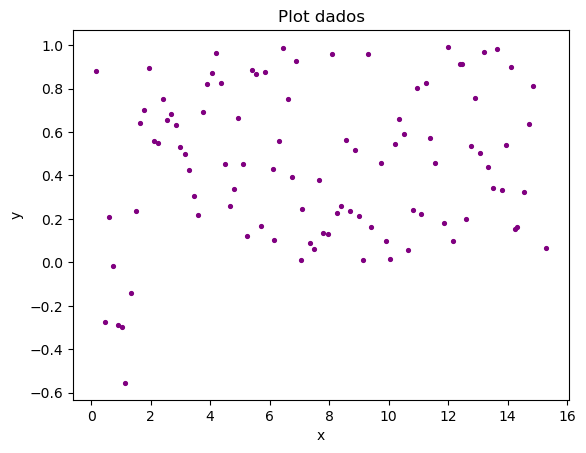

In [31]:
# Definindo o caminho do arquivo de forma absoluta
caminho_arquivo = "C:/Users/Luan/Desktop/dados.txt"  # Ajuste conforme necessário

# Lendo o arquivo "dados.txt" com Pandas
df = pd.read_csv(caminho_arquivo, delim_whitespace=True)

# Exibindo os dados
print(df)

# Lendo o arquivo "dados.txt" com NumPy
x, y = np.loadtxt(caminho_arquivo, unpack=True)
x_s, y_s = zip(*sorted(zip(x, y)))
x_s = np.array(x_s)
y_s = np.array(y_s)

# Plotando os dados
plt.scatter(x_s, y_s, s=30, marker='.', color='purple')
plt.title("Plot dados")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

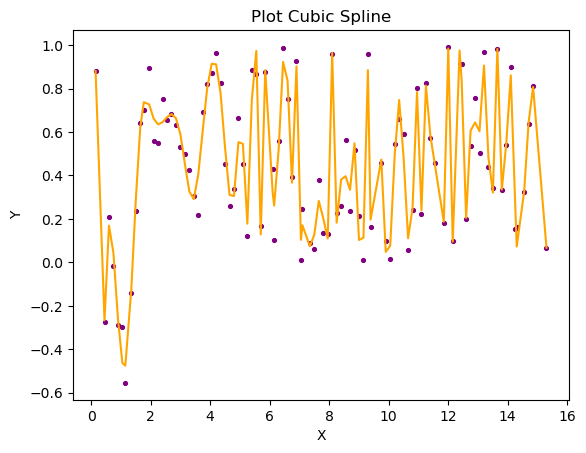

In [32]:
# (b) suavização tipo "cubic spline";

spl = UnivariateSpline(x_s, y_s)
spl.set_smoothing_factor(0.5)

plt.plot(x_s, spl(x_s), color="orange", lw=1.5)
plt.scatter(x_s,y_s,s=30,marker=".",color="purple")

plt.title("Plot Cubic Spline")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

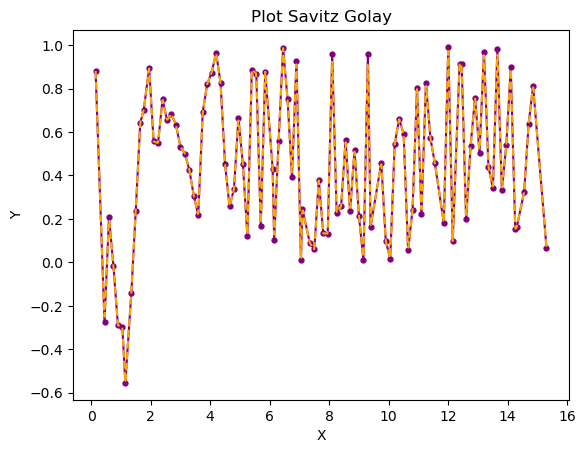

In [33]:
# (c) suavização tipo Savitz Golay;

y_int = interp1d(x_s,y_s, kind="linear")
x_int = np.linspace(min(x_s), max(x_s), 987)
Y = y_int(x_int)

plt.plot(x_s,y_s, marker='.', color="purple", ms= 7)
plt.plot(x_int, Y, '--', color="orange")

plt.title("Plot Savitz Golay")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

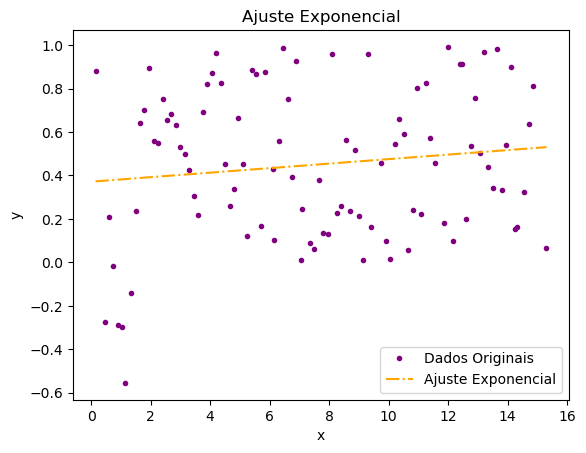

In [34]:
# (d) interpolação polinomial;

# Definindo a função de ajuste exponencial
def modelo_exp(x, a, b, c):
    return a * np.exp(b * x) + c

# Ajustando os parâmetros da curva
parametros, _ = curve_fit(modelo_exp, x_s, y_s, p0=(1, 0.1, 1))

# Definindo x_fit para gerar pontos suaves na curva ajustada
x_fit = np.linspace(min(x_s), max(x_s), 100)
y_fit = modelo_exp(x_fit, *parametros)

# Plotando os dados e o ajuste

plt.plot(x_s, y_s, '.', color='purple', label='Dados Originais')
plt.plot(x_fit, y_fit, '-.', color='orange', label='Ajuste Exponencial')

plt.title("Ajuste Exponencial")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

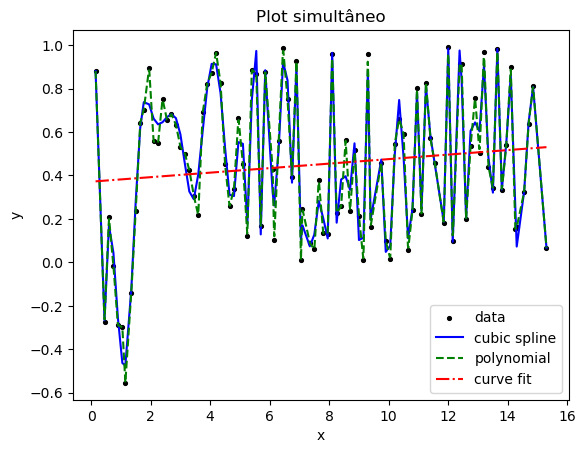

In [37]:
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

#Plotando os dados
plt.scatter(x_s, y_s, s=30, marker='.', color='black')

#Plot cubic spline
spl = UnivariateSpline(x_s, y_s)
spl.set_smoothing_factor(0.5)
plt.plot(x_s, spl(x_s), color='blue', lw = 1.5)


#Plot polinomial
y_int = interp1d(x_s, y_s, kind='linear')
x_int = np.linspace(min(x_s), max(x_s), 1000)
Y = y_int(x_int)
plt.plot(x_int, Y, '--', color='green')


#Plot curve fit

def modelo_exp(x, a, b, c):
    return a * np.exp(b * x) + c
    
parametros, _ = curve_fit(modelo_exp, x_s, y_s, p0=(1, 0.1, 1))
y_fit = modelo_exp(x_fit, *parametros)
plt.plot(x_fit, y_fit, '-.', color='red')

#Legenda e outros detalhes

plt.title("Plot simultâneo")
plt.legend(['data', 'cubic spline', 'polynomial', 'curve fit'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y');

Como os dados são muito dispersos mesmo ordenados, os fits feitos tiveram pouco padrão.
A situação é exatamente algo que ocorre com dados reais coletados em laboratório,
portanto foi interessante perceber como cada fit se adequou à "curva" obtida e como pode-se utilizá-los a 
depender do dado interessado.

In [ ]:
# Como ler dados em formato x, y em um arquivo de dados usando espaço como
# delimitador

x,y= [],[]

with open('file.txt') as f:
    for line in f:
        x, y = line.split()